<a href="https://colab.research.google.com/github/denisecammarota/tesis-ib/blob/master/patchmodels/SIR_Patchs_People_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auxiliary Code for the Models 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('seaborn')

In [ ]:
def initial_condition(N,n): #corregido a nro de personas
  S = np.zeros(n)
  I = np.zeros(n)
  R = np.zeros(n)
  S[0] = N*0.5 - 1
  I[0] =  1
  S[1:-1] = np.random.uniform(0,N*0.5)
  S[-1] = N*0.5 - np.sum(S[1:-1])
  return S,I,R

In [ ]:
def numbers_with_sum(n, k): #no necesito correccion a nro de personas
    """n numbers with sum k"""
    #https://stackoverflow.com/questions/58023361/generating-multiple-random-integer-number-with-fixed-sum-100-in-numpy-array (modified by me)
    if n == 1:
        return [k]
    if k == 0:
      num = 0
    elif k == 1:
      num = 1
    else:
      num = np.random.randint(1, k)
    return [num] + numbers_with_sum(n - 1, k - num)

In [ ]:
def initial_condition_alt(N,n): #corregido a nro de personas
  S = np.zeros(n)
  I = np.zeros(n)
  R = np.zeros(n)
  N_0 = numbers_with_sum(n,N)
  for i in range(n):
    if N_0[i] != 0:
      I[i] = np.random.randint(0,N_0[i])
      S[i] = N_0[i] - I[i]
    else:
      I[i] = 0
      S[i] = 0
  return S,I,R

In [ ]:
def initial_condition_new(sus,inf,n): #corregido a nro de personas
  S = np.ones(n)*sus
  I = np.zeros(n)
  I[0] = inf
  R = np.zeros(n)
  return S,I,R

In [ ]:
def matrices_sim(n,min,max): #no necesita correccion a nro de personas
  A = np.random.uniform(min,max,size=(n,n))
  A -= np.diag(np.diag(A))
  for i in range(n):
    for j in range(n):
      if j != i:
        A[i,i] -= A[i,j]
  return A

In [ ]:
def matrices_sim_2(n,min,max): #no necesita correccion a nro de personas 
  A = np.random.uniform(min,max,size=(n,n))
  A = (A + A.T)/2 #symmetric matrix as result 
  A -= np.diag(np.diag(A))
  for i in range(n):
    A[i,i] = 0
    for j in range(n):
      if j != i:
        A[i,i] -= A[i,j]
  return A

In [ ]:
def matrices_trivial(n): #no necesita correccion de nro de personas 
  A = np.zeros(shape=(n,n))
  return A

In [ ]:
def SIR_model(y0,t,n,beta,gamma,A):
  X = y0[0:n]
  Y = y0[n:2*n]
  Z = y0[2*n:]
  N = X+Y+Z
  aux_X = np.zeros(n)
  aux_Y = np.zeros(n)
  aux_Z = np.zeros(n)
  for i in range(n):
    aux_X_2 = 0
    aux_Y_2 = 0
    aux_Z_2 = 0
    for j in range(n):
        aux_X_2 += A[i,j]*X[j]*(N[i]/N[j])
        aux_Y_2 += A[i,j]*Y[j]*(N[i]/N[j])
        aux_Z_2 += A[i,j]*Z[j]*(N[i]/N[j])
    aux_X[i] = aux_X_2
    aux_Y[i] = aux_Y_2
    aux_Z[i] = aux_Z_2
  dXdt = -beta*X*Y/N + (aux_X)
  dYdt = beta*X*Y/N - gamma*Y + (aux_Y)
  dZdt = gamma*Y + (aux_Z)
  return np.concatenate((dXdt,dYdt,dZdt))

In [ ]:
def SIR_model_2(y0,t,n,beta,gamma,A,B):
  X = y0[0:n]
  Y = y0[n:2*n]
  Z = y0[2*n:]
  N = X+Y+Z
  dXdt = -beta*X*Y/N + N*(A@(X/N))
  dYdt = beta*X*Y/N - gamma*Y + N*(B@(Y/N))
  dZdt = gamma*Y + N*(A@(Z/N))
  return np.concatenate((dXdt,dYdt,dZdt))

In [ ]:
#@title 
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [ ]:
#@title 
def sign_custom(m):
  m_sign = np.sign(m)
  m_sign[m_sign == 0] = 1
  return m_sign

# SIR Model
In all models, I assume the following set of equations for each patch:

\begin{align}
\frac{dX_i}{dt} = -\frac{\beta X_{i} Y_{i}}{N_i} + \sum_{j} A_{ij} X_{j} \frac{N_i}{N_j} \\
\frac{dY_i}{dt} =  \frac{\beta X_{i} Y_{i}}{N_i} -\gamma Y_{i} + \sum_{j} A_{ij} Y_{j} \frac{N_i}{N_j} \\
\frac{dZ_i}{dt} = \gamma Y_{i} + \sum_{j} A_{ij} Z_{j} \frac{N_i}{N_j}\\
\end{align}

for $i=1,...,n$, assuming there are $n$ different patches.
For keeping the number of people constant in each patch, the following conditions are required:

\begin{align}
\sum_{j} A_{ij} = 0 \\
\end{align}

For simplicity, I assumed that all matrices are equal, just to have less parameters. Later, a different matrix B could be introduced so that it gives less mobility to infected people. Or we could remove this mobility. 

Main reference (used to construct the equations): https://www.sciencedirect.com/science/article/abs/pii/S0025556404000719?via%3Dihub

## Neutral Model
In all cases, the initial conditions are random, the matrix A (mobility) is not random in this case. Meaning, all that makes 'patches' different are actually only the initial conditions. These are important in the SIR model though, given that it can determine whether initially an epidemic outbreak dies out or not. 

Results for a= 1e-06


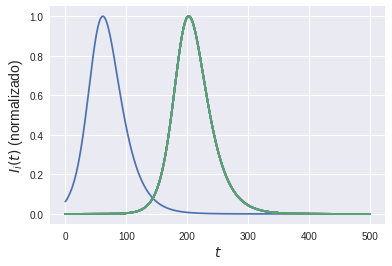

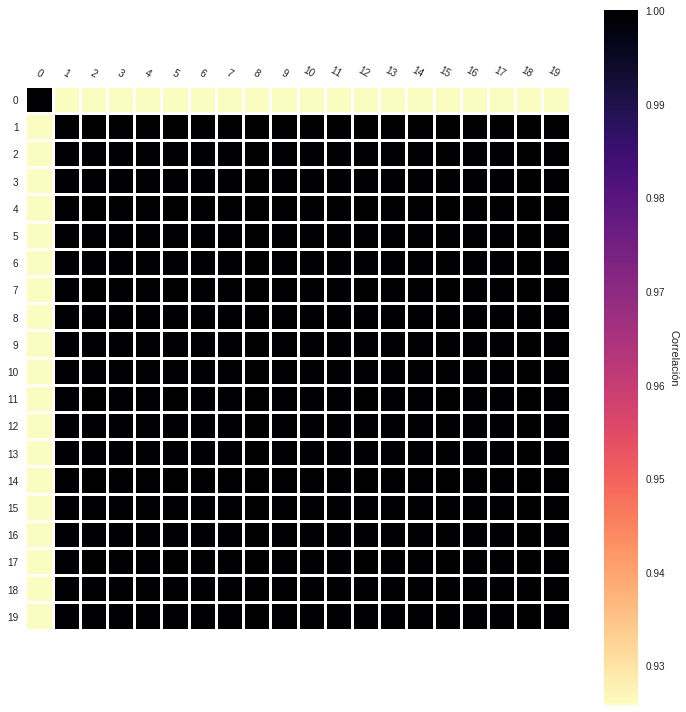

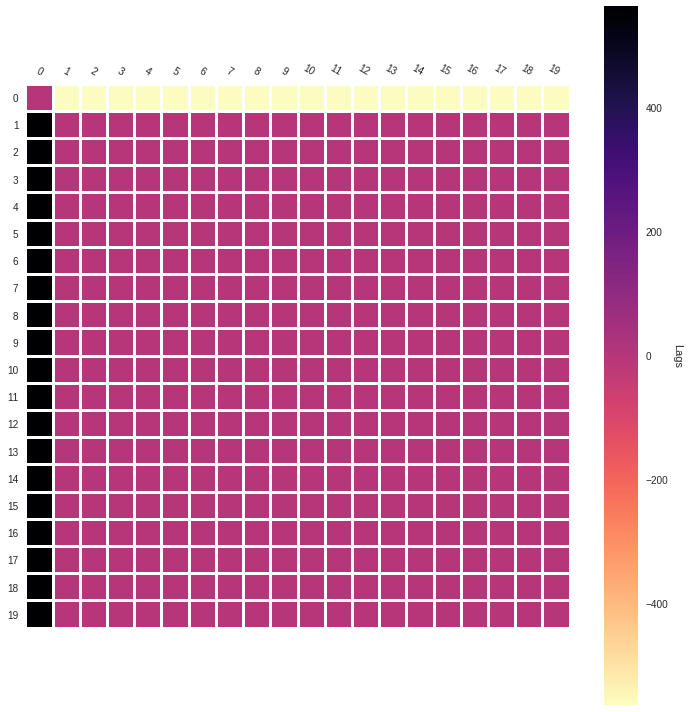

In [ ]:
#@title 
min = np.array([0.000001])
for k in min:
  n = 20 #number of regions
  sus = 1000000 #number of suceptibles in each region
  inf = 10000 #infected in one region at the start
  beta = 2*(1./14)
  gamma = 1./14
  S,I,R = initial_condition_new(sus,inf,n)
  A = matrices_sim(n,k,k)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  I_aux = np.copy(I)
  print('Results for a= '+str(k))
  for i in range(n):
    I_aux[:,i] = I_aux[:,i]/max(I_aux[:,i])
    plt.plot(t,I_aux[:,i])
  plt.ylabel(r'$I_i(t)$ (normalizado)',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.xlim((80,100))
  #plt.savefig('neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()


In [ ]:
print(S+I+R)

[[1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 ...
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]
 [1010000. 1000000. 1000000. ... 1000000. 1000000. 1000000.]]


## Non neutral Model
In all cases, the initial conditions are random, but the matrix A (mobility) is random in this case, thus making a 'non-neutral' model. The max vector has different values for different matrices A. For each value, the maximum values on the matrix will be between 0 and that value. For example, if max = 0.01, the elements of A will be random real numbers between 0 and max. 

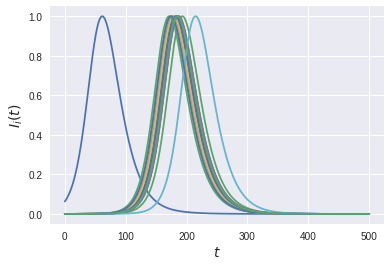

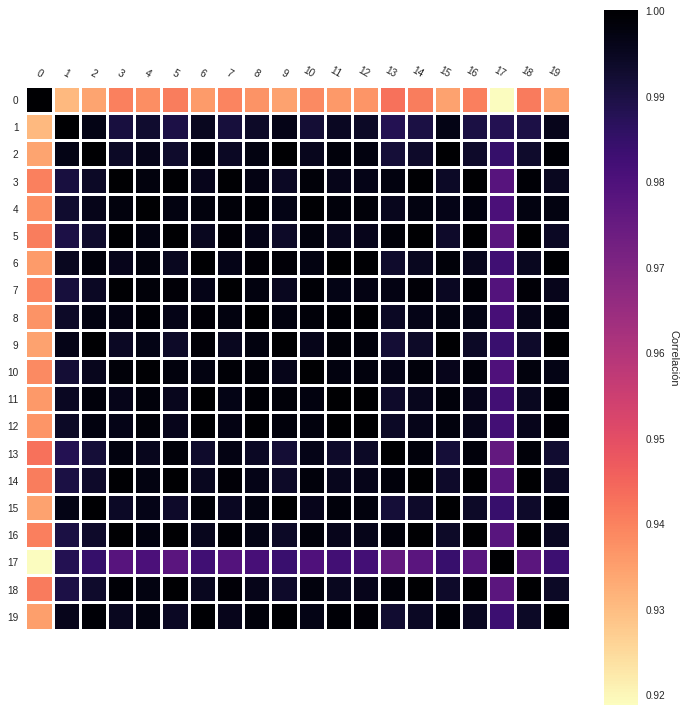

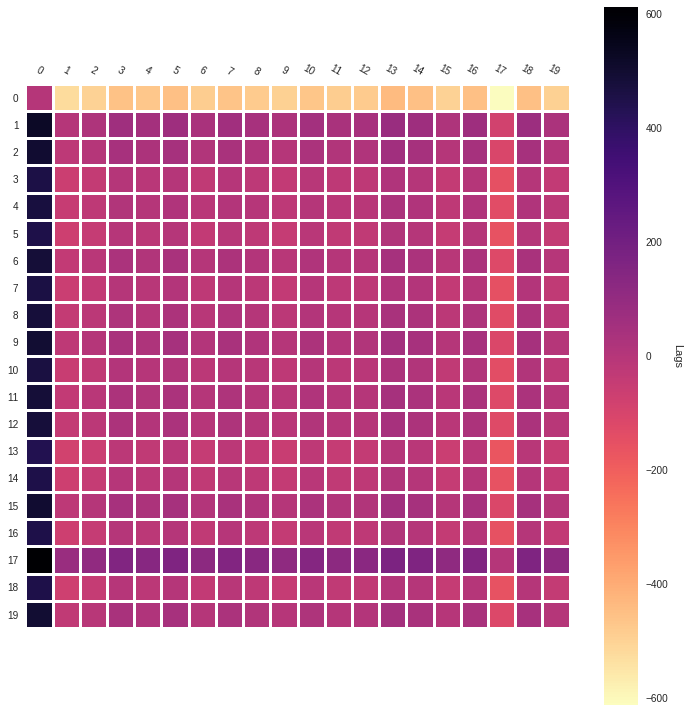

In [ ]:
#@title 
#maximum = np.array([0.1,0.001,0.0005,0.00025,0.00001])
maximum = np.array([0.00001])
for k in maximum:
  n = 20 #number of regions
  sus = 1000000 #number of suceptibles in each region
  inf = 10000 #infected in one region at the start
  beta = 2*(1./14)
  gamma = 1./14
  S,I,R = initial_condition_new(sus,inf,n)
  A = matrices_sim_2(n,0,k)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()


Grafico para el último las correlaciones, sin los valores de las autocorrelaciones, que son uno y que pueden distorsionarnos la escala de correlaciones. 

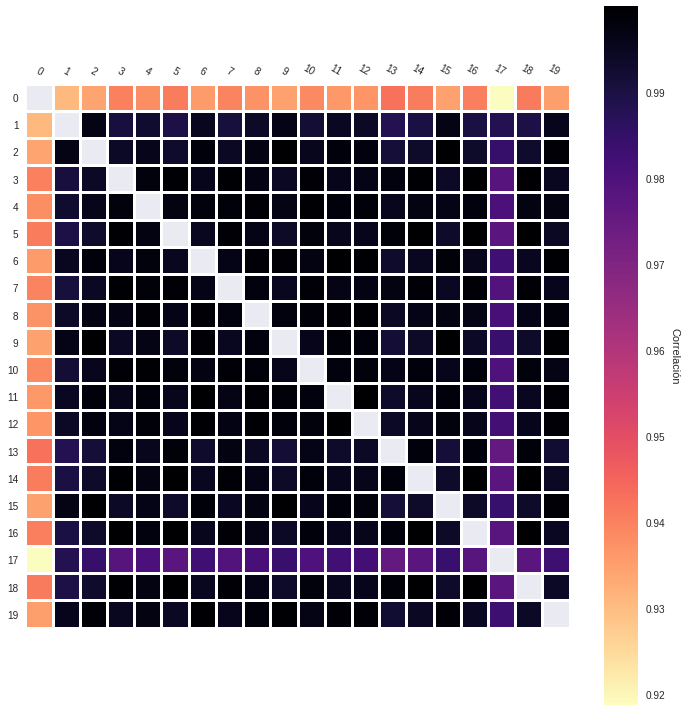

In [ ]:
#@title 
np.fill_diagonal(max_correlations,np.nan)
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()

In [ ]:
print(S+I+R)

[[1000000.0625789  1000000.         1000000.         ... 1000000.
  1000000.         1000000.        ]
 [ 999824.05732511  999999.99513355  999999.99236764 ...  999999.99909787
   999999.98103855  999999.99123039]
 [ 999645.08549485  999999.99009374  999999.98446356 ...  999999.99816336
   999999.96140257  999999.98214862]
 ...
 [1009999.97970968  999999.03490501  999999.25101903 ...  999997.5786498
   999999.54956739  999999.30782074]
 [1009999.97990954  999999.04506899  999999.25890316 ...  999997.60415486
   999999.5543008   999999.31510594]
 [1009999.98010745  999999.05512593  999999.2667043  ...  999997.62939127
   999999.55898447  999999.32231447]]


#Non Neutral: difference by population size only

Using the first case of the neutral matrix, different population sizes. 

In [ ]:
#@title 
population = np.array([2890151,15625084,367828,3308876,992595,1055259,509108,1235994,530162,673309,318951,333642,1738929,
              1101593,551266,638645,1214441,681055,432310,273964,3194537,874006,127205,1448188])

Results for a= 0.0001


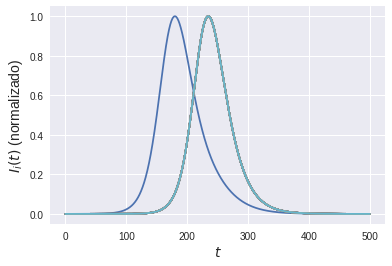

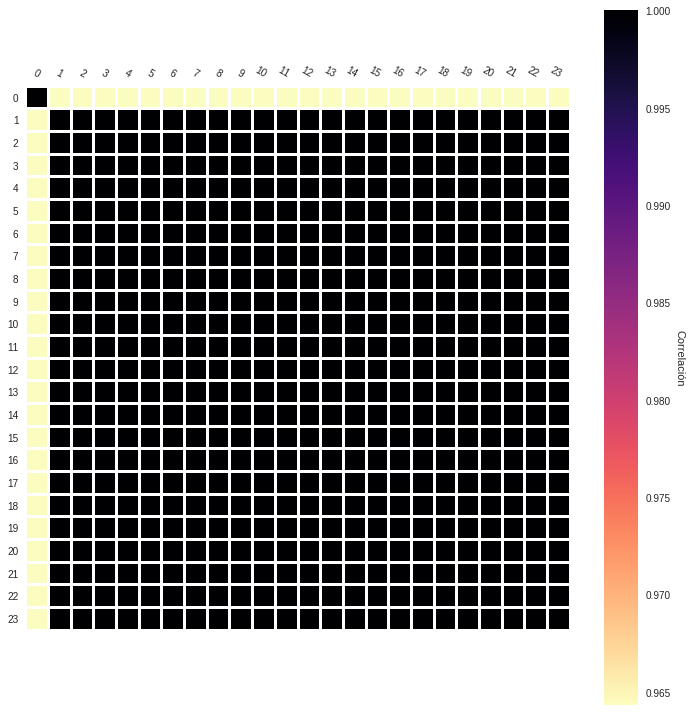

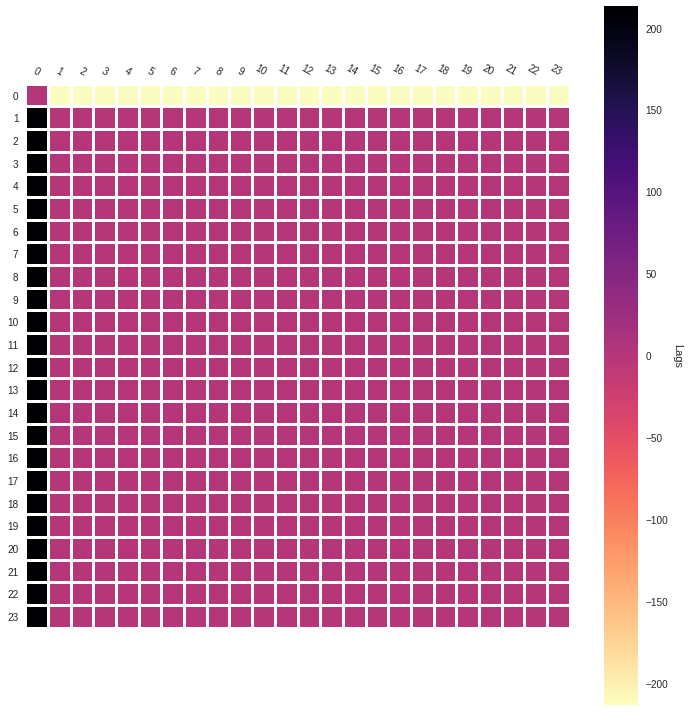

In [ ]:
#@title 
min = np.array([0.0001])
for k in min:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  S = np.copy(population)
  I = np.zeros(n)
  I[0] = 10
  R = np.zeros(n)
  A = matrices_sim(n,k,k)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  I_aux = np.copy(I)
  print('Results for a= '+str(k))
  for i in range(n):
    I_aux[:,i] = I_aux[:,i]/max(I_aux[:,i])
    plt.plot(t,I_aux[:,i])
  plt.ylabel(r'$I_i(t)$ (normalizado)',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.xlim((80,100))
  #plt.savefig('neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

#Non Neutral: difference by population size and using a random matrix

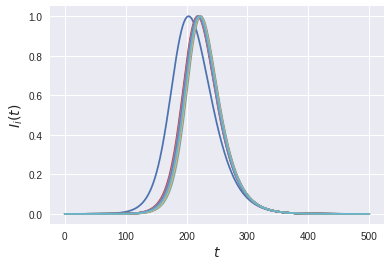

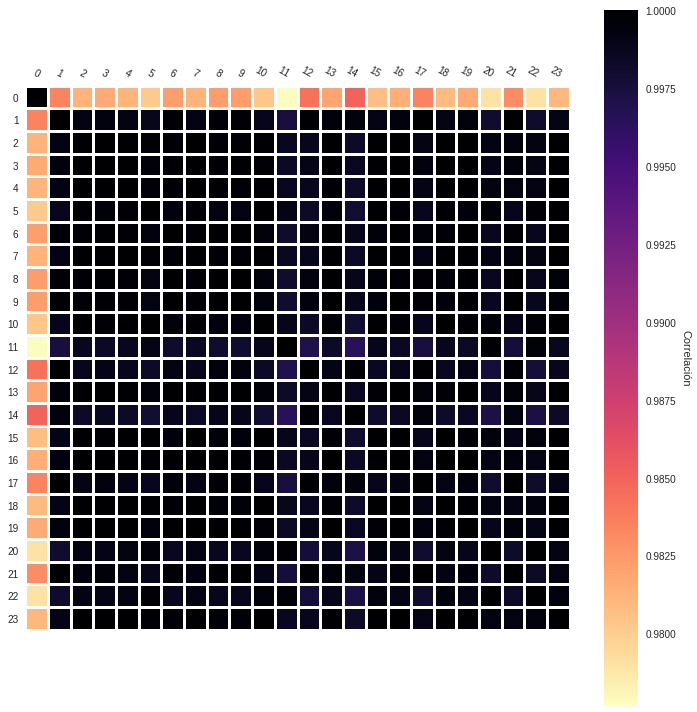

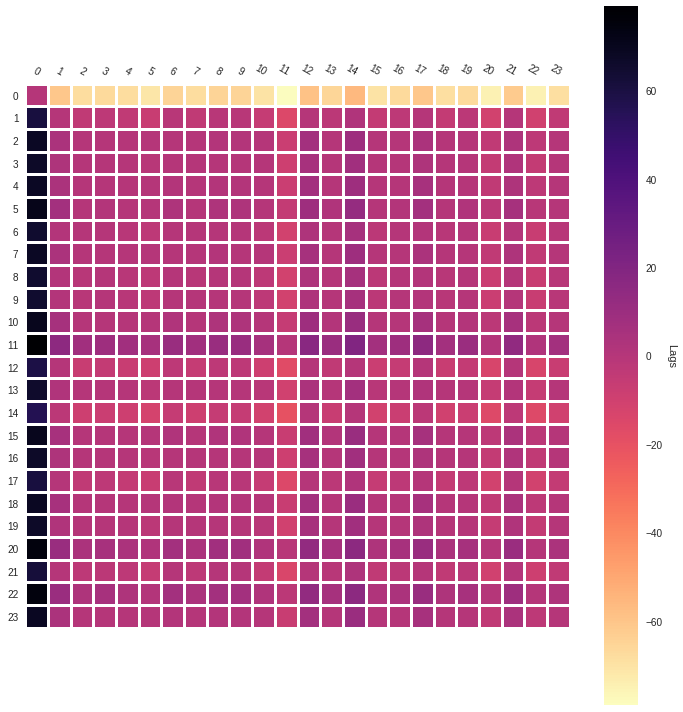

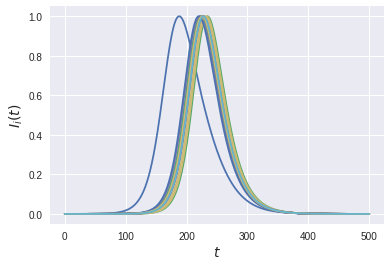

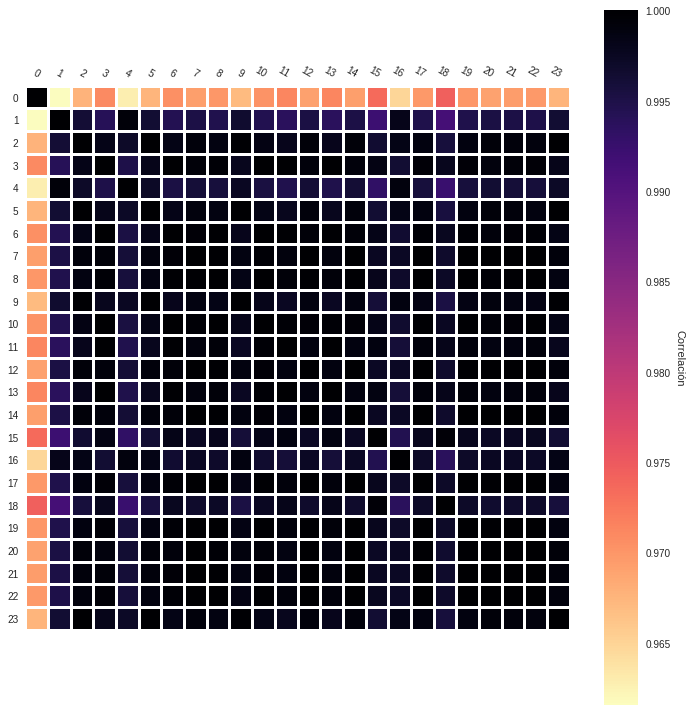

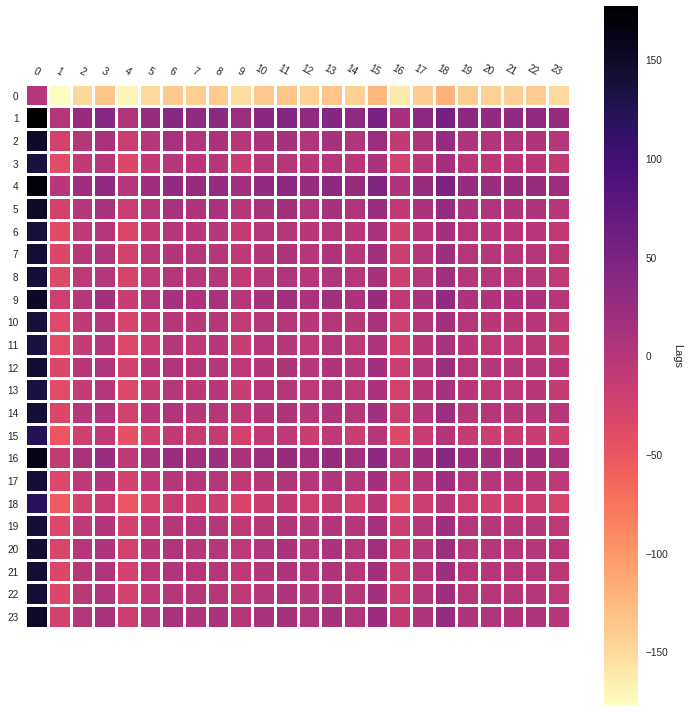

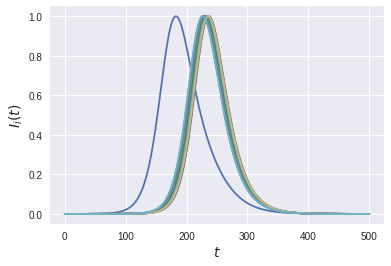

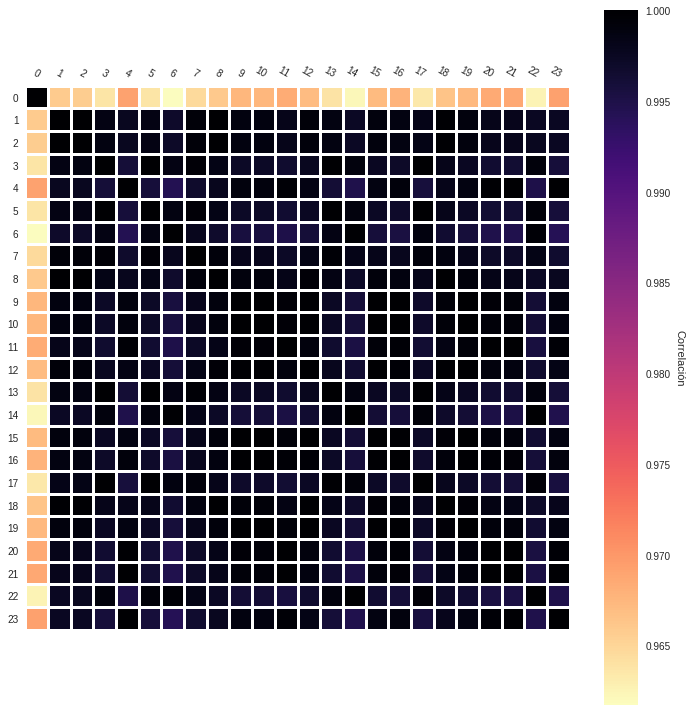

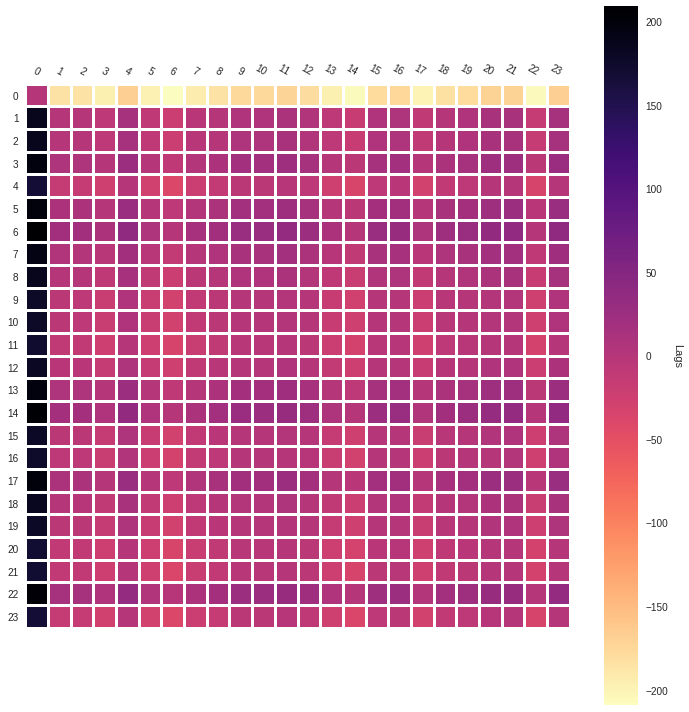

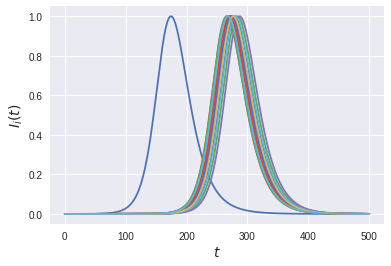

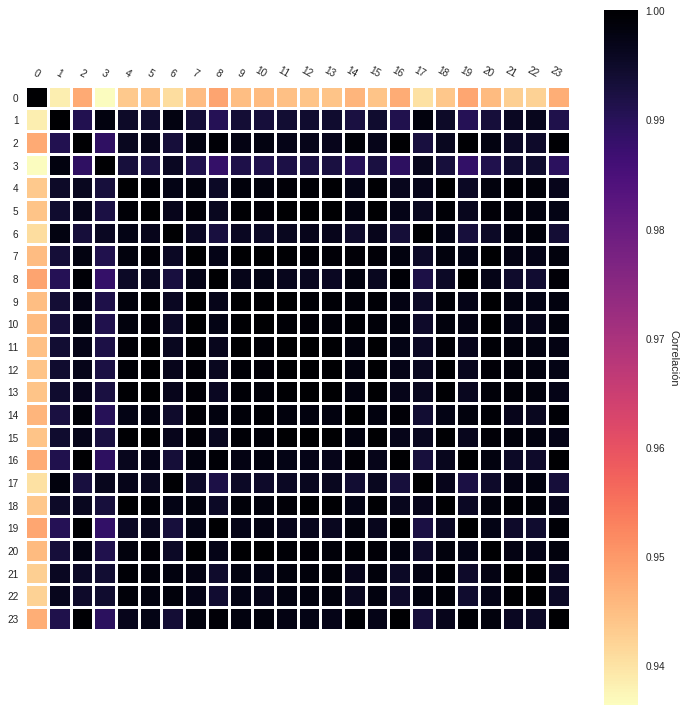

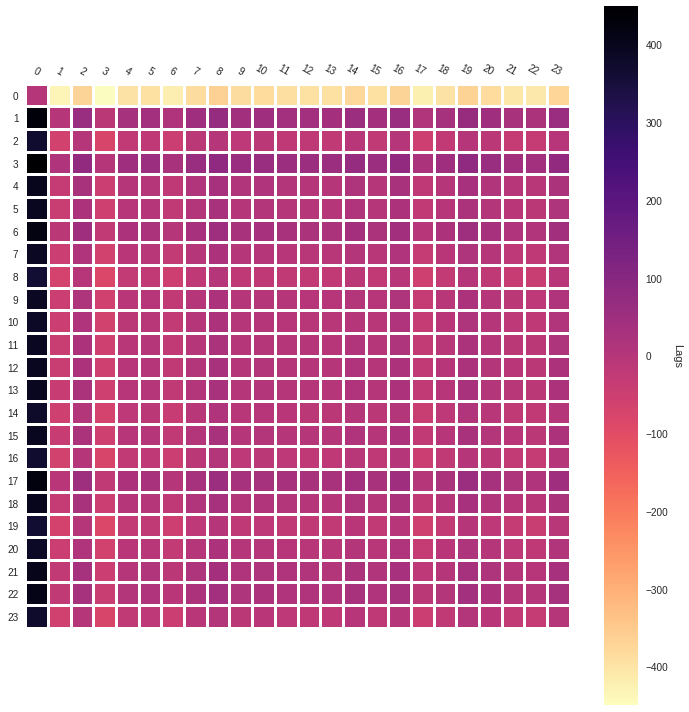

In [ ]:
#@title 
maximum = np.array([0.001,0.0005,0.00025,0.00001])
for k in maximum:
  n = population.shape[0] #number of regions
  sus = 1000000 #number of suceptibles in each region
  inf = 10000 #infected in one region at the start
  beta = 2*(1./14)
  gamma = 1./14
  S = np.copy(population)
  I = np.zeros(n)
  I[0] = 10
  R = np.zeros(n) 
  A = matrices_sim_2(n,0,k)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

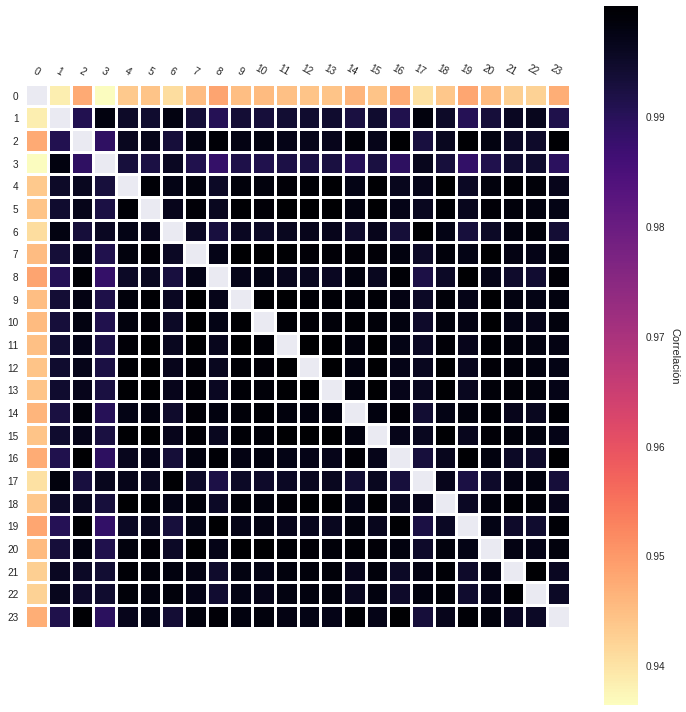

In [ ]:
#@title 
np.fill_diagonal(max_correlations,np.nan)
fig, ax = plt.subplots(figsize=(10,10))

im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()

In [ ]:
print(S+I+R)

[[ 2890151.00002258 15625084.           367828.         ...
    874006.           127205.          1448188.        ]
 [ 2890150.82045932 15625083.99996488   367827.99999725 ...
    874005.99999653   127204.99999953  1448187.99998981]
 [ 2890150.63767181 15625083.99992849   367827.9999944  ...
    874005.99999293   127204.99999904  1448187.99997925]
 ...
 [ 2890157.02765076 15624383.94997152   367819.61267361 ...
    873977.49814956   127200.71016023  1448153.82851526]
 [ 2890157.06622986 15624391.32405203   367819.70086053 ...
    873977.79817075   127200.7553297   1448154.18784923]
 [ 2890157.10443646 15624398.6204642    367819.78812026 ...
    873978.09503403   127200.8000236   1448154.54340478]]


# Non Neutral: difference by population size and using a function to generate conectivity matrix

In [ ]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.0001*(population[i]+population[j])/(pop_total)
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i!= j:
      A_new[i,i] -= A_new[i,j]

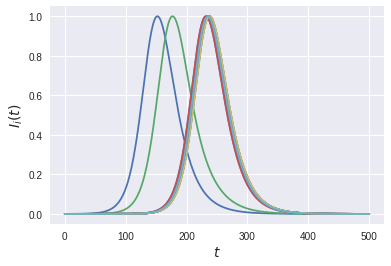

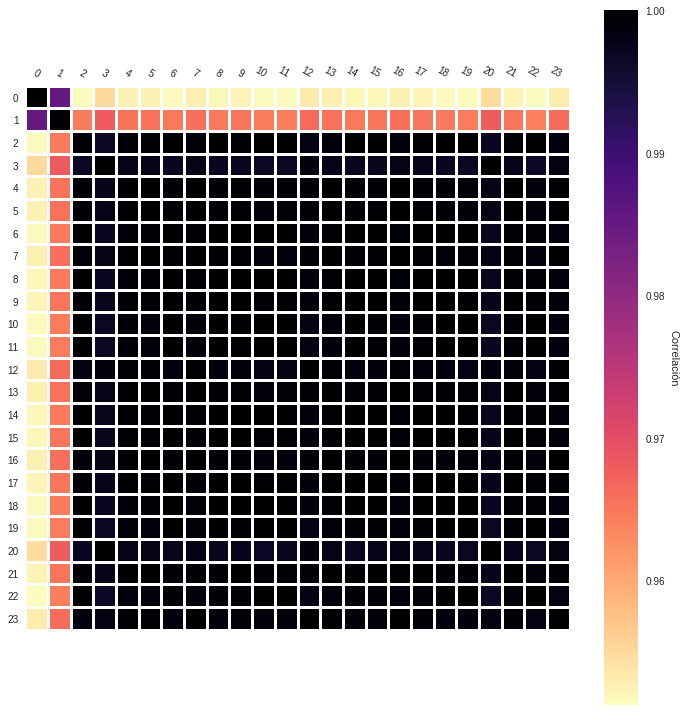

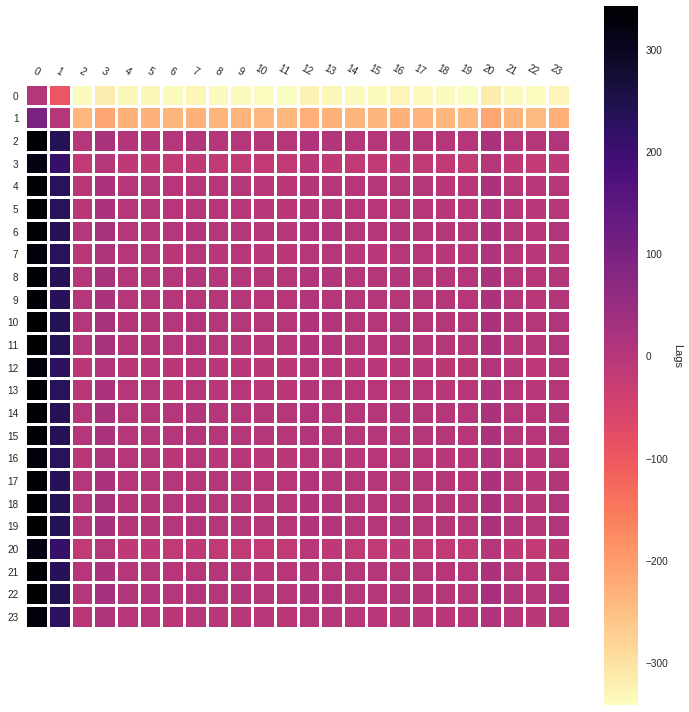

In [ ]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  S = np.copy(population)
  I = np.zeros(n)
  I[0] = 50
  I[1] = 50
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

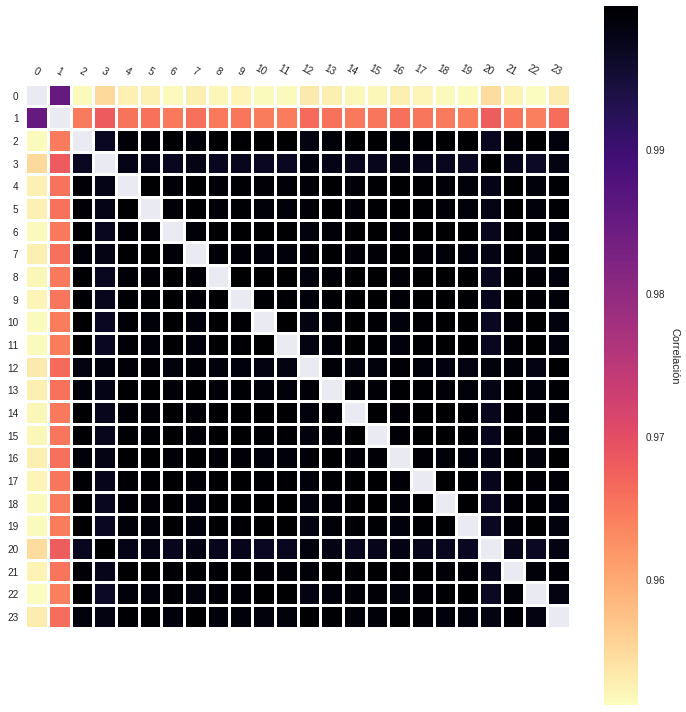

In [ ]:
  np.fill_diagonal(max_correlations,np.nan)
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

In [ ]:
print(S+I+R)

[[ 2890151.00011304 15625084.00002107   367828.         ...
    874006.           127205.          1448188.        ]
 [ 2890150.10380744 15625083.1094984    367827.99997495 ...
    874005.99993472   127204.99999173  1448187.99988104]
 [ 2890149.1914357  15625082.20311468   367827.99994899 ...
    874005.99986711   127204.99998317  1448187.99975782]
 ...
 [ 2890199.32640148 15625099.9366207    367825.63238632 ...
    874000.6522661    127204.15950245  1448179.58114604]
 [ 2890199.34276992 15625100.26925181   367825.65728695 ...
    874000.70850238   127204.16834243  1448179.6696596 ]
 [ 2890199.35897896 15625100.59865354   367825.68192567 ...
    874000.76414726   127204.17708944  1448179.7572425 ]]


# Last one with realistic initial conditions

In [ ]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
pop_infected = np.array([57,59,0,7,3,17,1,4,0,1,0,1,2,0,2,6,0,0,1,3,4,0,3,2]) #pop infected at day 70 by provinces
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.0001*(population[i]+population[j])/(pop_total)
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i != j:
      A_new[i,i] -= A_new[i,j]

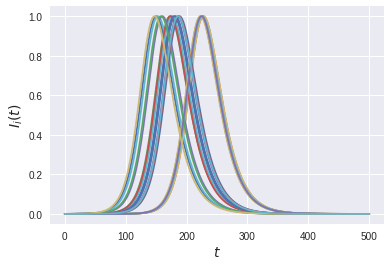

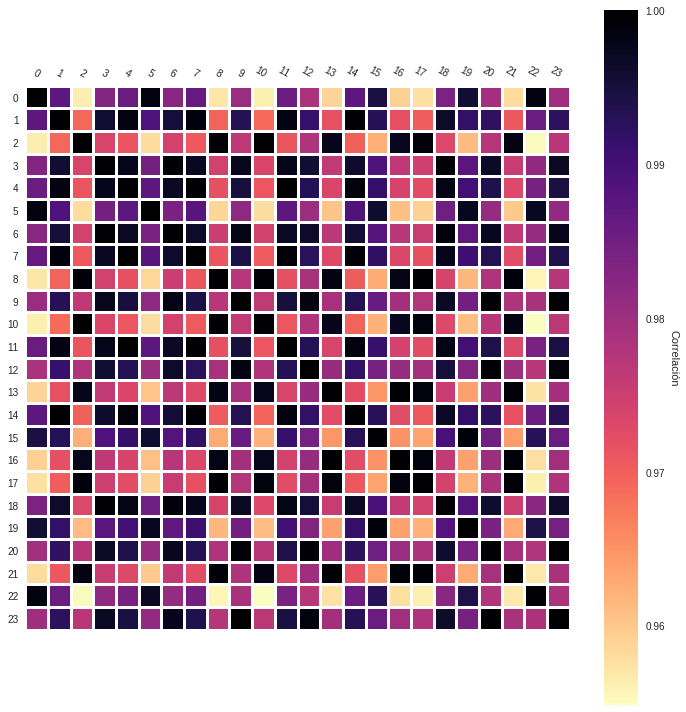

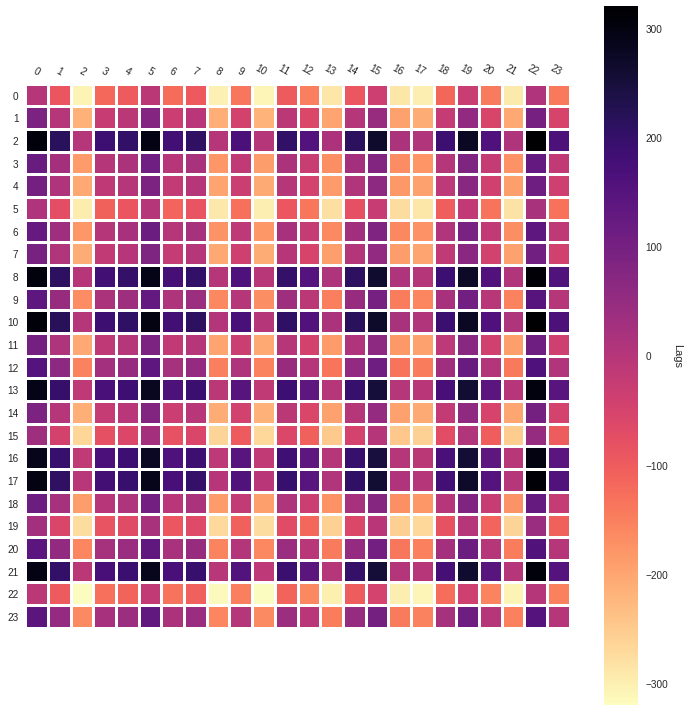

In [ ]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  I = np.copy(pop_infected)
  S = np.copy(population) - I
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

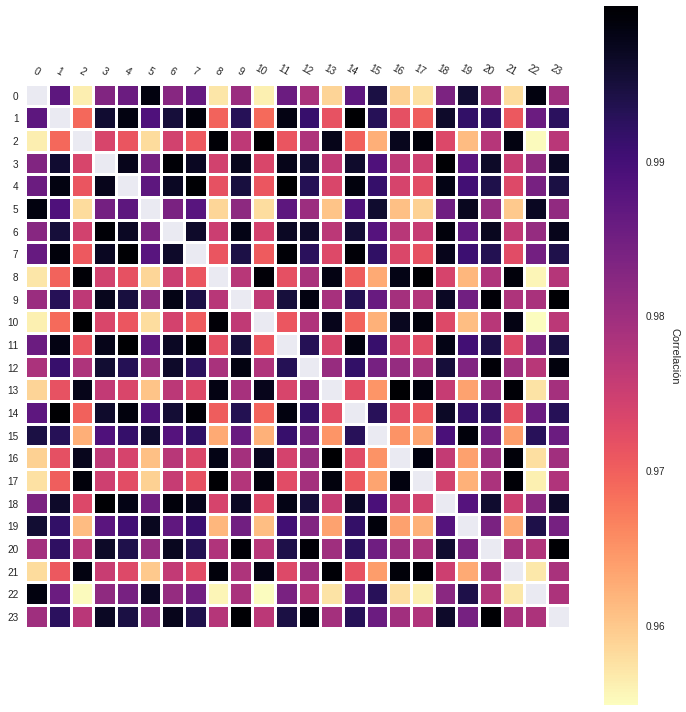

In [ ]:
  np.fill_diagonal(max_correlations,np.nan)
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

In [ ]:
print(S+I+R)

[[ 2890094.00012876 15625025.00002474   367828.         ...
    874006.           127202.00015381  1448186.00000901]
 [ 2890092.97778925 15625023.93569262   367827.99995043 ...
    874005.99985193   127201.94625525  1448185.96382124]
 [ 2890091.93711472 15625022.85216166   367827.99989908 ...
    874005.99969853   127201.89138839  1448185.92697872]
 ...
 [ 2890150.25542205 15625072.62621633   367826.45312515 ...
    874002.78040012   127204.97828265  1448186.90103755]
 [ 2890150.26299805 15625072.74181478   367826.46940005 ...
    874002.8142749    127204.9785077   1448186.91255784]
 [ 2890150.27049704 15625072.85624047   367826.48550372 ...
    874002.84779327   127204.97873042  1448186.92395735]]


# Distances between places model - real initial condition

In [ ]:
distancia = np.zeros((24,24))

In [ ]:
distancia[0,:] = np.array([1,715,940,1191,61,1150,1050,1158,480,1040,1455,1023,2635,1155,1203,1510,1110,790,1543,478,620,1043,3228,960])
distancia[1,1:] = np.array([1,898,1043,757,435,670,1137,361,1213,1455,875,3635,440,590,897,500,420,930,330,600,430,3228,1194])
distancia[2,2:] = np.array([1,191,978,993,1565,1989,590,315,2187,23,3367,845,791,803,1398,1318,883,568,1378,633,3960,2046])
distancia[3,3:] = np.array([1,1253,1136,1710,2060,744,506,2378,168,3558,988,936,948,1543,1463,960,713,1523,776,4151,2117])
distancia[4,4:] = np.array([1,1189,1152,1197,555,1061,1414,996,2551,1188,1309,1614,1213,894,1645,527,670,1184,3132,957])
distancia[5,5:] = np.array([1,617,1472,796,1308,1890,970,3070,156,388,695,450,550,770,765,1035,360,3663,1629])
distancia[6,6:] = np.array([1,855,916,1925,1620,1587,2800,773,1005,1227,167,260,1345,885,765,977,3393,1359])
distancia[7,7:] = np.array([1,1378,2198,750,2012,1930,1588,1860,2082,1022,883,2200,1347,537,1567,2523,660])
distancia[8,8:] = np.array([1,820,1696,576,2876,801,798,1105,861,656,1138,31,841,1638,3469,1435])
distancia[9,9:] = np.array([1,2495,338,3675,1160,1106,1118,1758,1633,1198,883,1660,948,4268,2000])
distancia[10,10:] = np.array([1,2210,1180,1895,2045,2352,1680,1360,2385,1665,855,1885,1773,495])
distancia[11,11:] = np.array([1,3390,822,765,780,1420,1295,860,545,1475,610,3983,2069])
distancia[12,12:] = np.array([1,3075,3225,3532,2860,2540,3565,2845,2035,3065,593,1675])
distancia[13,13:] = np.array([1,232,539,606,705,572,770,1040,212,3668,1634])
distancia[14,14:] = np.array([1,307,838,938,340,767,1190,160,3818,1784])
distancia[15,15:] = np.array([1,1145,1245,99,1074,1497,467,4125,2091])
distancia[16,16:] = np.array([1,320,1220,830,825,810,3435,1419])
distancia[17,17:] = np.array([1,1320,625,505,850,3133,1099])
distancia[18,18:] = np.array([1,1107,1530,500,4158,2124])
distancia[19,19:] = np.array([1,810,607,3438,1404])
distancia[20,20:] = np.array([1,1030,2628,594])
distancia[21,21:] = np.array([1,3658,1624])
distancia[22,22:] = np.array([1,2268])
distancia[23,23:] = np.array([1])

In [ ]:
distancia_real = distancia + distancia.T

In [ ]:
np.fill_diagonal(distancia_real,1)

In [ ]:
distancia_real

array([[1.000e+00, 7.150e+02, 9.400e+02, 1.191e+03, 6.100e+01, 1.150e+03,
        1.050e+03, 1.158e+03, 4.800e+02, 1.040e+03, 1.455e+03, 1.023e+03,
        2.635e+03, 1.155e+03, 1.203e+03, 1.510e+03, 1.110e+03, 7.900e+02,
        1.543e+03, 4.780e+02, 6.200e+02, 1.043e+03, 3.228e+03, 9.600e+02],
       [7.150e+02, 1.000e+00, 8.980e+02, 1.043e+03, 7.570e+02, 4.350e+02,
        6.700e+02, 1.137e+03, 3.610e+02, 1.213e+03, 1.455e+03, 8.750e+02,
        3.635e+03, 4.400e+02, 5.900e+02, 8.970e+02, 5.000e+02, 4.200e+02,
        9.300e+02, 3.300e+02, 6.000e+02, 4.300e+02, 3.228e+03, 1.194e+03],
       [9.400e+02, 8.980e+02, 1.000e+00, 1.910e+02, 9.780e+02, 9.930e+02,
        1.565e+03, 1.989e+03, 5.900e+02, 3.150e+02, 2.187e+03, 2.300e+01,
        3.367e+03, 8.450e+02, 7.910e+02, 8.030e+02, 1.398e+03, 1.318e+03,
        8.830e+02, 5.680e+02, 1.378e+03, 6.330e+02, 3.960e+03, 2.046e+03],
       [1.191e+03, 1.043e+03, 1.910e+02, 1.000e+00, 1.253e+03, 1.136e+03,
        1.710e+03, 2.060e+03, 7.440

In [ ]:
population_orden = [2890151,3308876,992595,530162,15625084,333642,1738929,551266,1235994,1101593,509108,1055259,273964,367828,1448188,1214441,681055,432310,673307,3194537,318951,874006,127205,638645]

## Beginning in CABA and BA 

In [50]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
pop_infected = np.array([57,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) #pop infected at day 70 by provinces #CABA 57 BAIRES 59
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.01*(population[i]+population[j])/(pop_total)*(1/distancia_real[i,j])
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i != j:
      A_new[i,i] -= A_new[i,j]

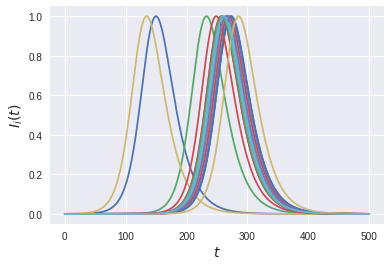

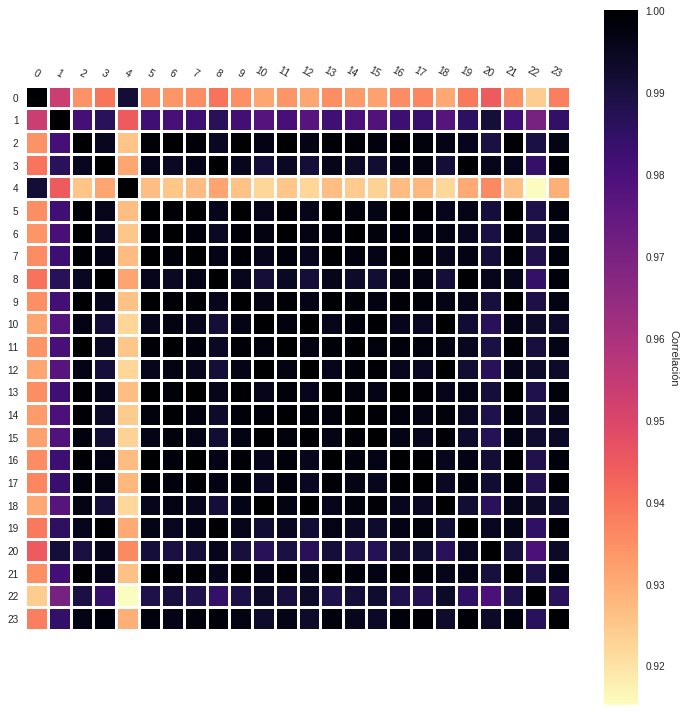

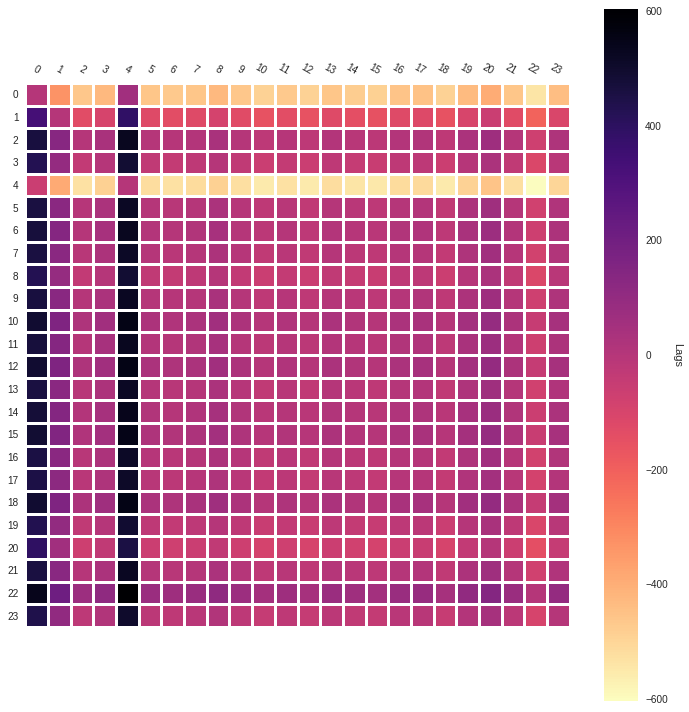

In [51]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  I = np.copy(pop_infected)
  S = np.copy(population) - I
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

## Beginning in CABA, BA, ST and JY

In [48]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
pop_infected = np.array([57,0,0,0,59,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]) #pop infected at day 70 by provinces #CABA 57 BAIRES 59
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.1*(population[i]+population[j])/(pop_total)*(1/distancia_real[i,j])
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i != j:
      A_new[i,i] -= A_new[i,j]

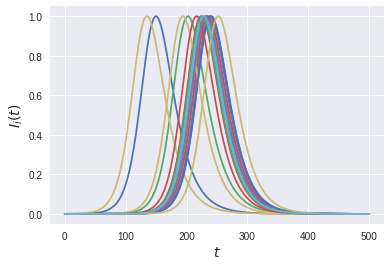

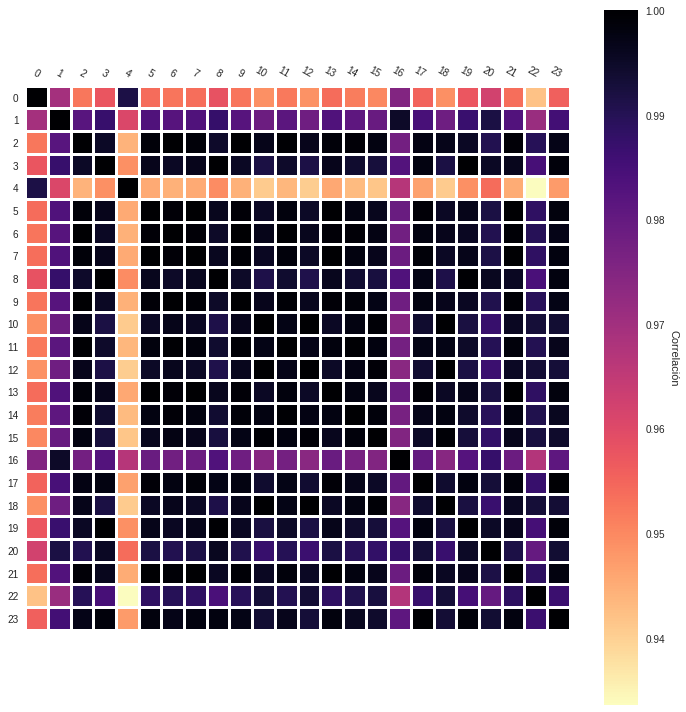

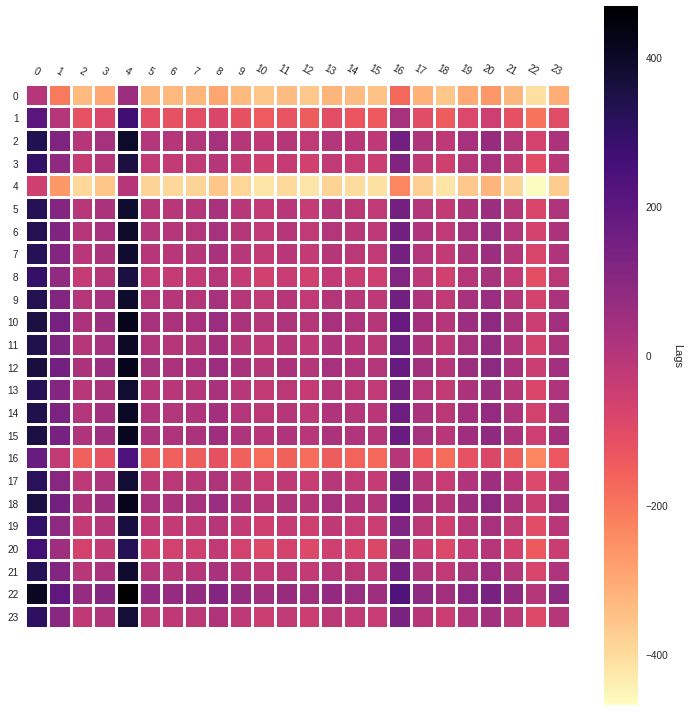

In [49]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  I = np.copy(pop_infected)
  S = np.copy(population) - I
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

## Beginning initial conditions

In [53]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
pop_infected = np.array([57,7,3,0,59,1,2,2,4,0,1,17,3,0,2,0,0,1,1,4,0,0,3,6]) #pop infected at day 70 by provinces #CABA 57 BAIRES 59
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.0001*(population[i]+population[j])/(pop_total)*(1/distancia_real[i,j])
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i != j:
      A_new[i,i] -= A_new[i,j]

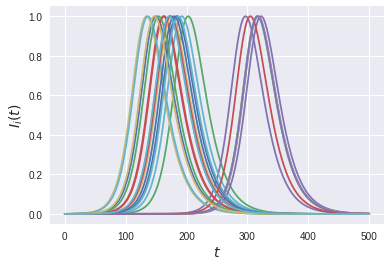

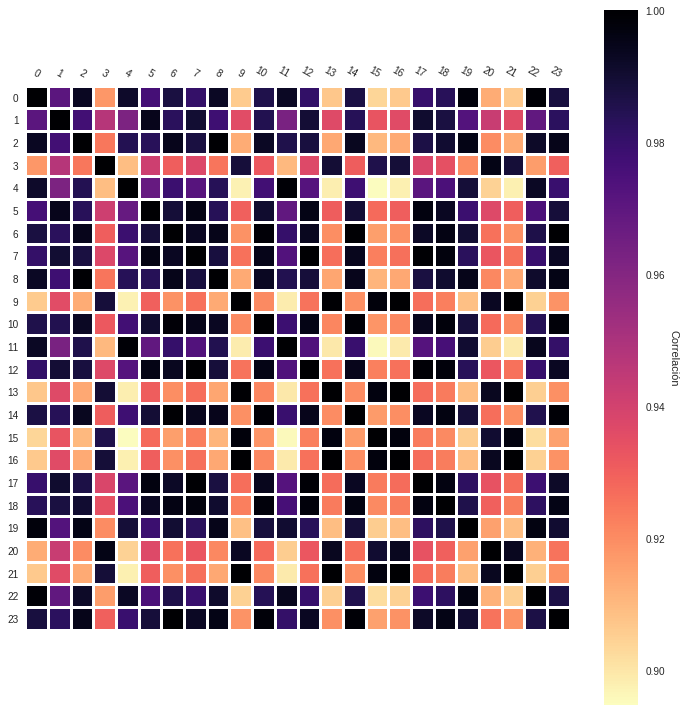

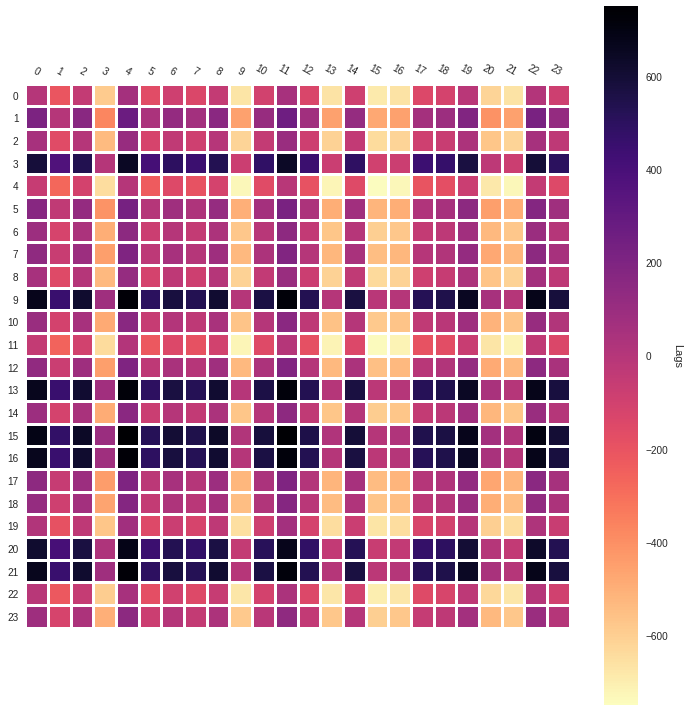

In [54]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  I = np.copy(pop_infected)
  S = np.copy(population) - I
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

# Distances between places model - false initial condition

## Beginning in CABA and BA

In [57]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
pop_infected = np.array([50,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) #pop infected at day 70 by provinces #CABA 57 BAIRES 59
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.01*(population[i]+population[j])/(pop_total)*(1/distancia_real[i,j])
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i != j:
      A_new[i,i] -= A_new[i,j]

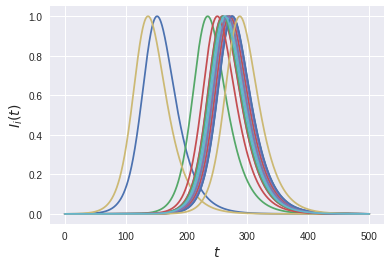

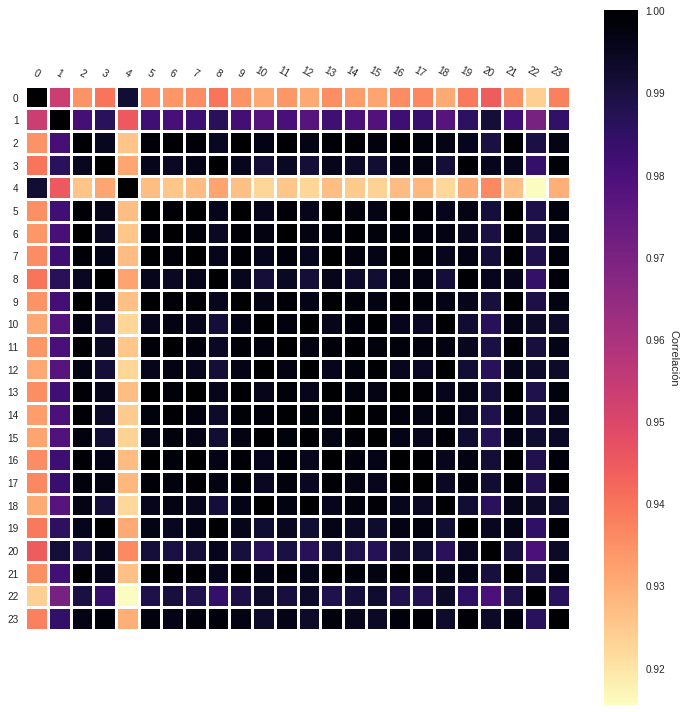

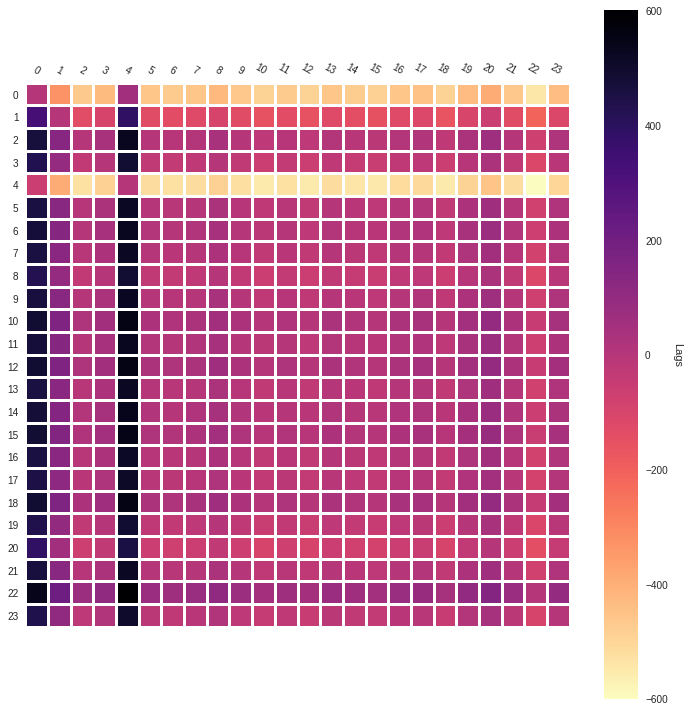

In [58]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  I = np.copy(pop_infected)
  S = np.copy(population) - I
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()

## Beginning in CABA, BA, ST and JY

In [59]:
#trying to relate matrix A to the population sizes of each place
n = population.shape[0]
pop_total = np.sum(population)
pop_infected = np.array([50,0,0,0,50,0,0,0,0,0,0,0,0,50,0,0,50,0,0,0,0,0,0,0]) #pop infected at day 70 by provinces #CABA 57 BAIRES 59
A_new = np.zeros(shape=(n,n))
for i in range(n):
  for j in range(n):
    A_new[i,j] = 0.1*(population[i]+population[j])/(pop_total)*(1/distancia_real[i,j])
for i in range(n):
  A_new[i,i] = 0
  for j in range(n):
    if i != j:
      A_new[i,i] -= A_new[i,j]

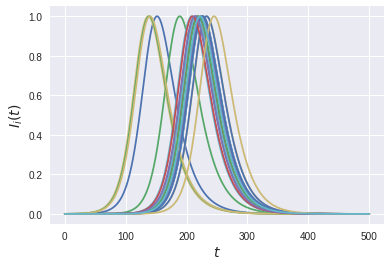

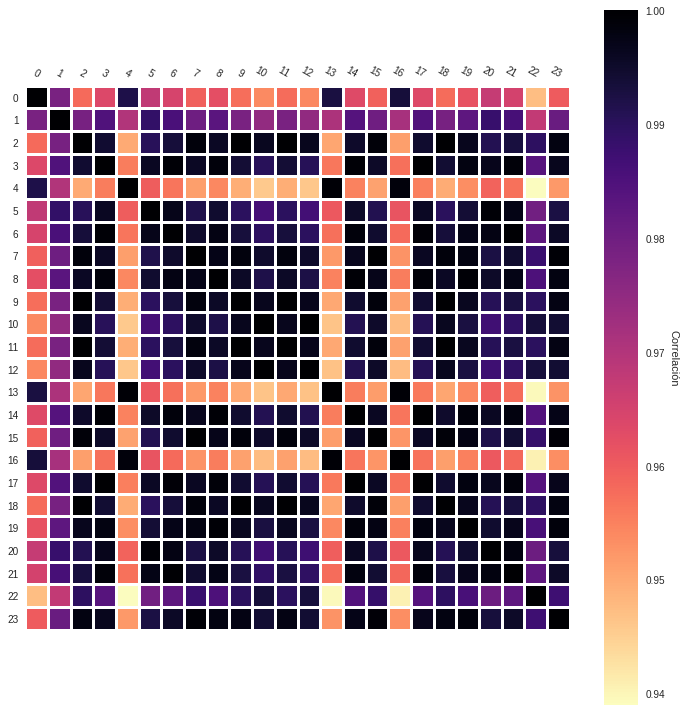

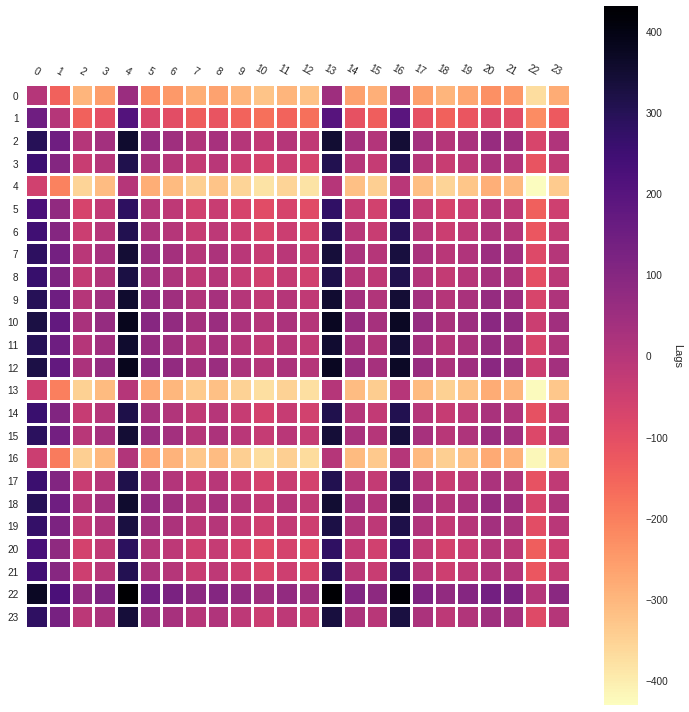

In [60]:
  n = population.shape[0] #number of regions
  beta = 2*(1./14)
  gamma = 1./14
  I = np.copy(pop_infected)
  S = np.copy(population) - I
  R = np.zeros(n) 
  A = np.copy(A_new)
  tmax = 500
  t = np.linspace(0,tmax,(tmax+1)*4)
  y0 = np.concatenate((S,I,R))
  result = odeint(SIR_model,y0, t, args=(n,beta,gamma,A))
  S = result[:,0:n]
  I = result[:,n:2*n]
  R = result[:,2*n:]
  for i in range(n):
    I[:,i] = I[:,i]/max(I[:,i])
    plt.plot(t,I[:,i])
  plt.ylabel(r'$I_i(t)$',fontsize=14)
  plt.xlabel(r'$t$',fontsize=14)
  #plt.savefig('non_neutral_a_'+str(k)+'.pdf')
  plt.show()
  max_correlations = np.zeros((n,n))
  max_lags = np.zeros((n,n))
  npts = I[:,0].shape[0]
  lags = np.arange(-npts + 1, npts)
  for i in range(n):
    for j in range(n):
      ccov = np.correlate(I[:,i]-I[:,i].mean(),I[:,j]-I[:,j].mean(),mode='full')
      ccor = ccov / (npts * I[:,i].std() * I[:,j].std())
      max_correlations[i,j] = np.max(ccor)
      max_lags[i,j] = lags[np.argmax(ccor)]
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_correlations, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Correlación")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()
  fig, ax = plt.subplots(figsize=(10,10))

  im, cbar = heatmap(max_lags, range(n), range(n), ax=ax,
                    cmap="magma_r", cbarlabel="Lags")
  #texts = annotate_heatmap(im, valfmt="{x:.1f} t")

  plt.grid()
  fig.tight_layout()
  plt.show()